In [1]:
import pandas as pd # importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris=pd.read_csv("D:\\Sem 4\\ML\\week2\\iris.csv")
iris.head()
iris["Species_num"] = iris["Species"].map({"Iris-setosa": -1, "Iris-virginica": 0, "Iris-versicolor": 1 })

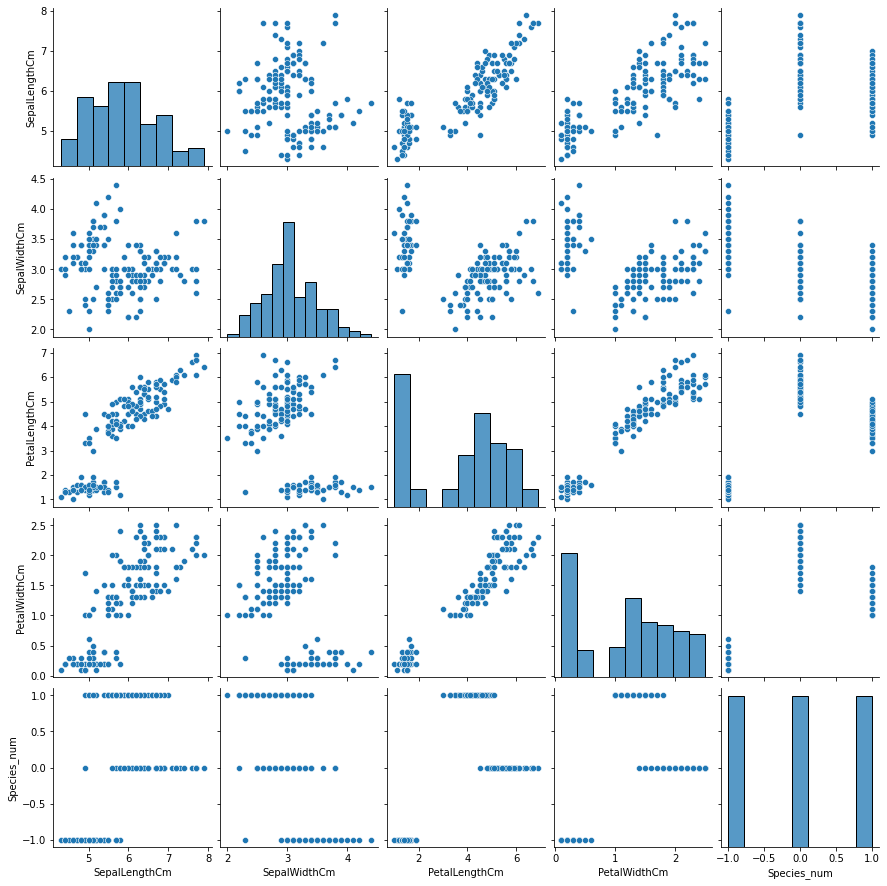

In [3]:
sns.pairplot(iris.loc[:, iris.columns != 'Id'])

In [4]:
x1 = iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y1 = iris["Species_num"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3) 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', solver='liblinear') 
model.fit(x_train,y_train)# fitting data points to model



LogisticRegression(multi_class='ovr', solver='liblinear')

In [5]:
y_pred=model.predict(x_test) 

In [6]:
y_test.to_numpy(), y_pred

(array([ 1, -1,  1,  0, -1,  1,  0,  0,  1,  1,  0, -1,  1,  0,  0,  0, -1,
         1,  0, -1, -1, -1,  0,  0, -1,  1,  1, -1, -1,  1, -1,  0,  1,  1,
        -1, -1, -1,  0,  0,  1,  1,  0, -1,  1,  0], dtype=int64),
 array([ 1, -1,  1,  0, -1,  1,  0,  0,  1,  1,  0, -1,  1,  0,  0,  0, -1,
         1,  0, -1, -1, -1,  0,  0, -1,  1,  1, -1, -1,  1, -1,  0,  1,  1,
        -1, -1, -1,  0,  0,  0,  1,  0, -1,  1,  0], dtype=int64))

In [7]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

0.14907119849998599

In [8]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2*100,'%')

96.66666666666667 %


In [37]:
x1 = iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y1 = iris["Species_num"]
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3, random_state = 50) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
acc = []
k = []
for i in range(2,20):
    model1 = KNeighborsClassifier(n_neighbors =i) 
    model1.fit(x_train1,y_train1)
    y_pred1=model1.predict(x_test1) 
    r2 = r2_score(y_test1, y_pred1)
    acc.append(r2*100)
    k.append(i)

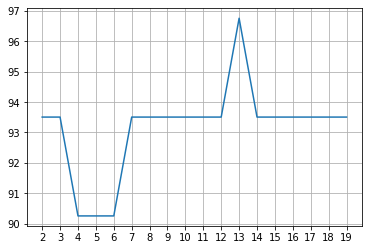

In [38]:
plt.grid()
plt.plot(k,acc)
plt.xticks(np.arange(2,20))
plt.show()

In [40]:
print(max(acc))

96.75324675324676


In [41]:
#in this instance, the best value for k is k=13
#it give the maximum accuracy, acc = 96.75%
#Both the models seem to be performing equally well, with KNeighborsClassifier being slightly better